In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Load dataset

data = pd.read_csv("D:\Excelr .PROJECT\Stock Market.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
# Converting date back to string

data['Date'] = data['Date'].apply(lambda x: ''.join([c for c in x if isinstance(c, str)]))

In [4]:
# Reconstruction of date

data['Date'] = data['Date'].str.replace(r"(\\d{2})(\\d{2})(\\d{4})", r"\\1-\\2-\\3", regex=True)

In [5]:
data.shape

(2011, 7)

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [9]:
data.nunique()

Date         2011
Open         1909
High         1900
Low          1905
Close        1912
Adj Close    1983
Volume       2006
dtype: int64

In [10]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
5,10-01-2012,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
6,11-01-2012,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
7,12-01-2012,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
8,13-01-2012,59.957142,60.064285,59.808571,59.972858,51.824898,56505400
9,17-01-2012,60.599998,60.855713,60.422855,60.671429,52.428562,60724300


In [11]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [12]:
# Checking Missing Values

data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
# Fill missing numeric values with previous day (forward fill)

data.fillna(method='ffill', inplace=True)
data

C:\Users\saile\AppData\Local\Temp\ipykernel_31044\1875377135.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [14]:
# Checking for duplicates

data.duplicated().sum()

np.int64(0)

In [15]:
# Removing Duplicates

data.drop_duplicates(inplace=True)

In [16]:
# Checking the Datatypes

data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [17]:
# Changing the Datatype

data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y',errors='raise')

In [18]:
#Sorting the Date
# order format
data = data.sort_values('Date').reset_index(drop=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [19]:
# datatypes after changing date datatype

data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [20]:
# Dataset

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Feature Engineering:

## Moving averages & volatility

In [21]:
# Creating Moving Averages and Volatility
#time-series DataFrame,calculated multiple moving averages and rolling volatility to analyze price trends and risk, 
#cleaned missing values, and indexed by date for time-based analysis.”
df = data[['Date','Close']].copy()
df['ma7'] = df['Close'].rolling(7).mean()
df['ma14'] = df['Close'].rolling(14).mean()
df['ma21'] = df['Close'].rolling(21).mean()
df['volatility'] = df['Close'].rolling(7).std()  # 7-day rolling volatility
df = df.dropna()
df.set_index('Date', inplace=True)
df

,Close,ma7,ma14,ma21,volatility
Date,,,,,
2012-02-01,65.169998,63.768571,62.195204,61.413265,1.769540
2012-02-02,65.017143,64.476938,62.539388,61.711837,0.715307
2012-02-03,65.668571,64.742652,62.946224,62.026394,0.769094
2012-02-06,66.281425,65.137346,63.346938,62.338911,0.744759
2012-02-07,66.975716,65.577142,63.752244,62.654762,0.797450
...,...,...,...,...,...
2019-12-23,284.000000,279.802852,273.877138,270.734283,2.576166
2019-12-24,284.269989,281.105708,275.486424,271.805235,2.091410
2019-12-26,289.910004,282.541425,277.224282,272.926188,3.824892


## Time features

In [22]:
# Creating time features
#date feature extraction from the DatetimeIndex to capture weekly, monthly, quarterly, and yearly patterns for time-series analysis and modeling.”
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.isocalendar().week
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df

,Close,ma7,ma14,ma21,volatility,day_of_week,week_of_year,month,quarter,year
Date,,,,,,,,,,
2012-02-01,65.169998,63.768571,62.195204,61.413265,1.769540,2,5,2,1,2012
2012-02-02,65.017143,64.476938,62.539388,61.711837,0.715307,3,5,2,1,2012
2012-02-03,65.668571,64.742652,62.946224,62.026394,0.769094,4,5,2,1,2012
2012-02-06,66.281425,65.137346,63.346938,62.338911,0.744759,0,6,2,1,2012
2012-02-07,66.975716,65.577142,63.752244,62.654762,0.797450,1,6,2,1,2012
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,284.000000,279.802852,273.877138,270.734283,2.576166,0,52,12,4,2019
2019-12-24,284.269989,281.105708,275.486424,271.805235,2.091410,1,52,12,4,2019
2019-12-26,289.910004,282.541425,277.224282,272.926188,3.824892,3,52,12,4,2019


In [23]:
for lag in [1,2,3,5,7]:
    df[f'lag_{lag}'] = df['Close'].shift(lag)  # Lag features provide the previous days’ closing prices.


In [24]:
df['SP500_Close'] = df['Close'] * 1.02  # Approximation of overall market trend. Stocks often move with the market.
df['Inflation'] = 2.1  # Macro-economic factor
df['Earnings_Season'] = df.index.month.isin([1,4,7,10]).astype(int)  # Captures quarterly earnings announcements (Jan, Apr, Jul, Oct).
df['Target'] = df['Close'].shift(-1)   #Next-day closing price (what we want to predict)

In [25]:
df.dropna(inplace=True)  # Remove rows with missing values created by rolling/lag
df.reset_index(drop=False, inplace=True)  # Dropping these ensures clean data for modeling.

# Explanatory Data Analysis(EDA)

# Line Plot

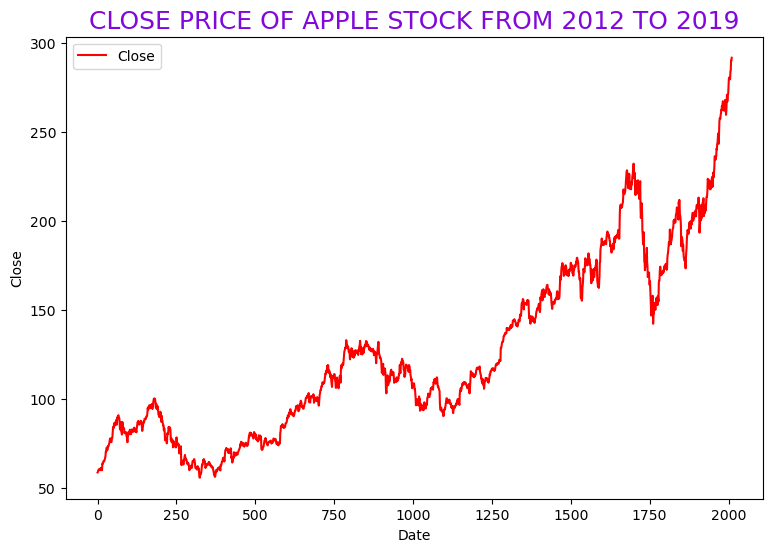

In [26]:
# Plotting Closing prices 
plt.figure(figsize=(9,6))
plt.title('CLOSE PRICE OF APPLE STOCK FROM 2012 TO 2019',fontsize=18,color='#8207DB')
plt.xlabel('Date')
plt.ylabel('Close')
#“How did Apple’s stock price change over time?”
#Line Plot
plt.plot(data['Close'],label='Close',color='red')
plt.legend()
plt.show()

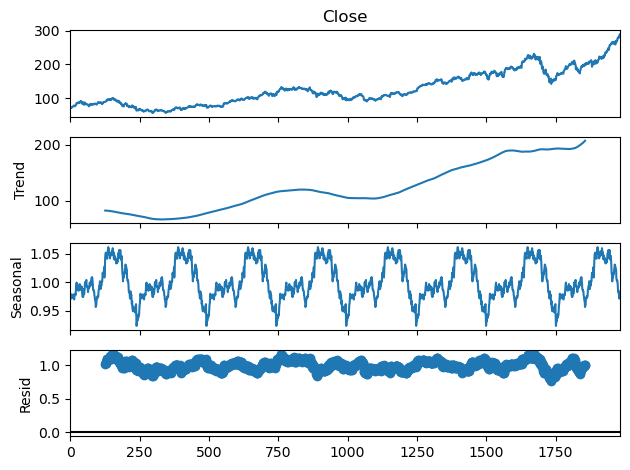

In [27]:
decompose_result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
decompose_result.plot()
plt.show()

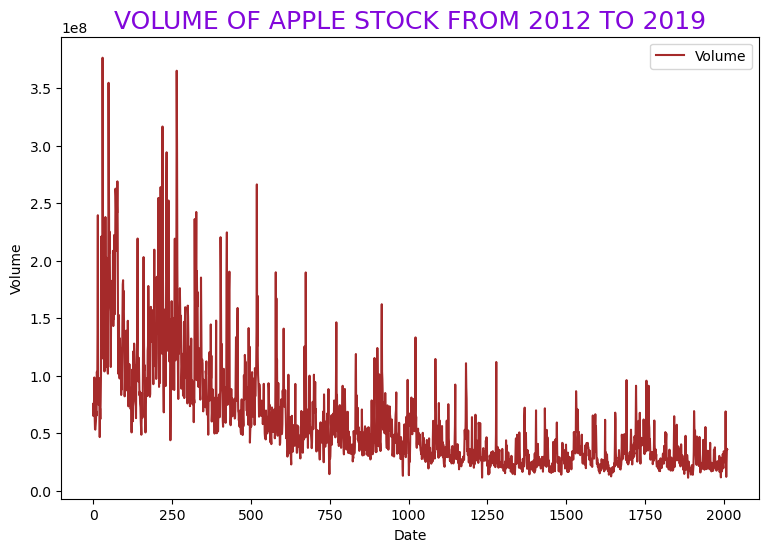

In [28]:
# Plotting Volume Trend 
plt.figure(figsize=(9,6))
plt.title('VOLUME OF APPLE STOCK FROM 2012 TO 2019',fontsize=18,color='#8207DB')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.plot(data['Volume'],label='Volume',color='brown')
plt.legend()
plt.show()

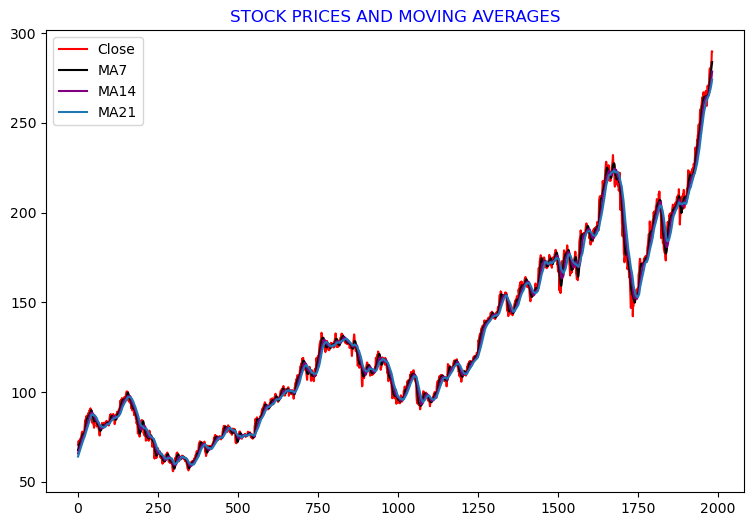

In [29]:
# Line plot Moving Averages
plt.figure(figsize=(9,6))
plt.plot(df.index, df['Close'], label='Close',color='red')
plt.plot(df.index, df['ma7'], label='MA7',color = 'black')
plt.plot(df.index, df['ma14'], label='MA14',color='purple')
plt.plot(df.index, df['ma21'], label='MA21')
plt.legend()
plt.title("STOCK PRICES AND MOVING AVERAGES", color='blue')
plt.show()

# Histogram

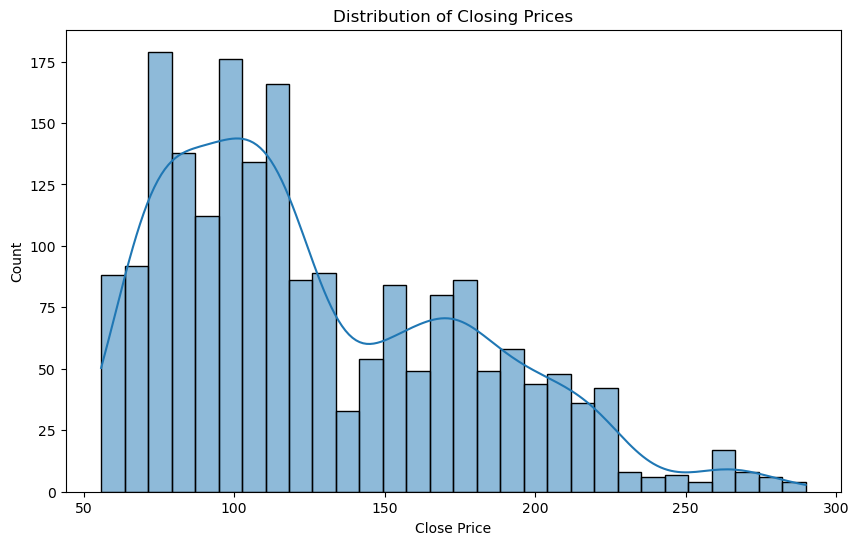

In [30]:
#At what price ranges did Apple stock trade most often
plt.figure(figsize=(10,6))
sns.histplot(df['Close'],kde=True,bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.show()

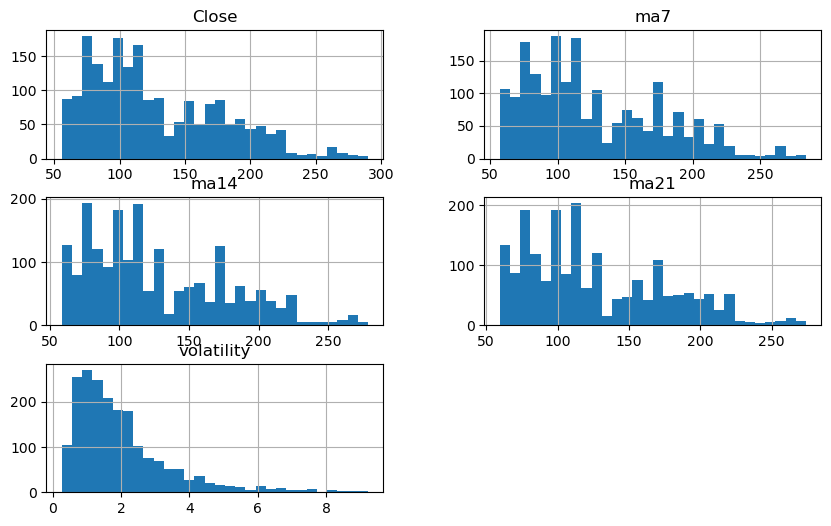

In [31]:
# Histogram
df[['Close','ma7','ma14','ma21','volatility']].hist(figsize=(10,6), bins=30)
plt.show()

# Boxplot

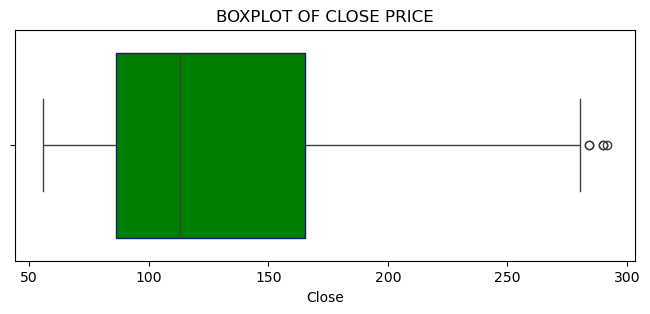

In [32]:
plt.figure(figsize=(8,3))
sns.boxplot(x=data['Close'],
            boxprops = dict(facecolor ='green', edgecolor='midnightblue')
           )
plt.title("BOXPLOT OF CLOSE PRICE")
plt.show()

# Correlation heatmap

In [33]:
corr = df.corr(numeric_only=True)
corr

,Close,ma7,ma14,ma21,volatility,day_of_week,week_of_year,month,quarter,year,lag_1,lag_2,lag_3,lag_5,lag_7,SP500_Close,Inflation,Earnings_Season,Target
Close,1.000000,0.998410,0.996261,0.993923,0.485663,-0.000520,0.170658,0.166304,0.165173,0.885602,0.999095,0.998169,0.997346,0.995732,0.993959,1.000000,NaN,-0.021010,0.999099
ma7,0.998410,1.000000,0.998957,0.997086,0.488947,0.000538,0.174123,0.169542,0.167893,0.886826,0.999006,0.999351,0.999458,0.998992,0.997507,0.998410,NaN,-0.021240,0.997558
ma14,0.996261,0.998957,1.000000,0.999269,0.498188,0.000230,0.177271,0.172764,0.171161,0.888119,0.997043,0.997693,0.998210,0.998865,0.998992,0.996261,NaN,-0.019989,0.995342
ma21,0.993923,0.997086,0.999269,1.000000,0.509034,0.000193,0.178944,0.174877,0.173706,0.889497,0.994801,0.995585,0.996269,0.997370,0.998114,0.993923,NaN,-0.017361,0.992944
volatility,0.485663,0.488947,0.498188,0.509034,1.000000,-0.009867,0.073461,0.073181,0.079293,0.441489,0.486247,0.487007,0.488058,0.490766,0.495108,0.485663,NaN,-0.063148,0.485229
day_of_week,-0.000520,0.000538,0.000230,0.000193,-0.009867,1.000000,-0.015113,-0.014948,-0.018371,0.002998,0.002201,0.001982,-0.000221,-0.000023,0.001108,-0.000520,NaN,-0.021578,-0.000556
week_of_year,0.170658,0.174123,0.177271,0.178944,0.073461,-0.015113,1.000000,0.976420,0.950873,-0.030611,0.171768,0.172792,0.173809,0.176318,0.178069,0.170658,NaN,-0.166042,0.169750
month,0.166304,0.169542,0.172764,0.174877,0.073181,-0.014948,0.976420,1.000000,0.970531,-0.035475,0.167397,0.168454,0.169392,0.171425,0.173286,0.166304,NaN,-0.177650,0.165210
quarter,0.165173,0.167893,0.171161,0.173706,0.079293,-0.018371,0.950873,0.970531,1.000000,-0.030707,0.166064,0.166886,0.167697,0.169427,0.171345,0.165173,NaN,0.031760,0.164296
year,0.885602,0.886826,0.888119,0.889497,0.441489,0.002998,-0.030611,-0.035475,-0.030707,1.000000,0.885717,0.885861,0.885964,0.886113,0.886288,0.885602,NaN,0.019620,0.885456


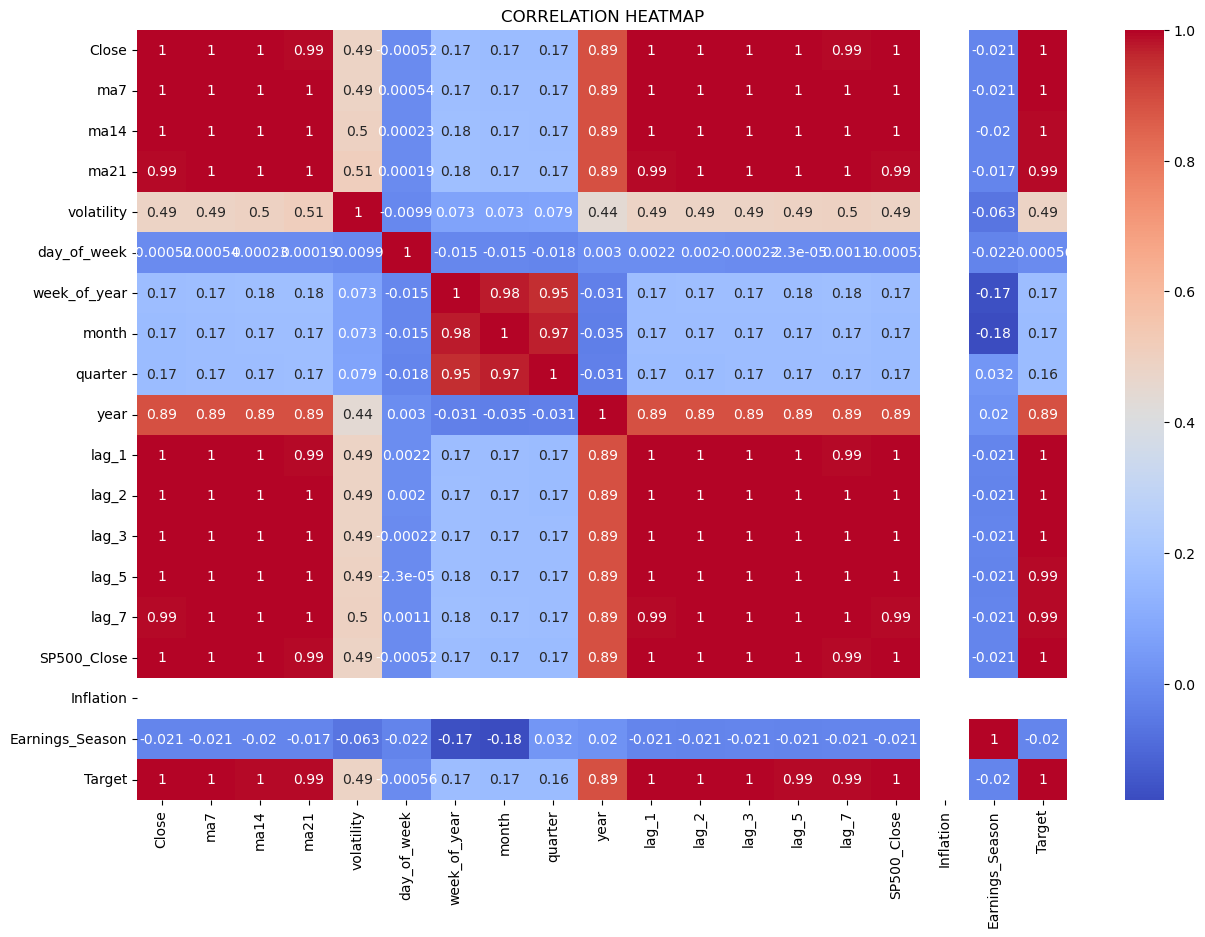

In [34]:
# Correlated heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()

# Pair Plot

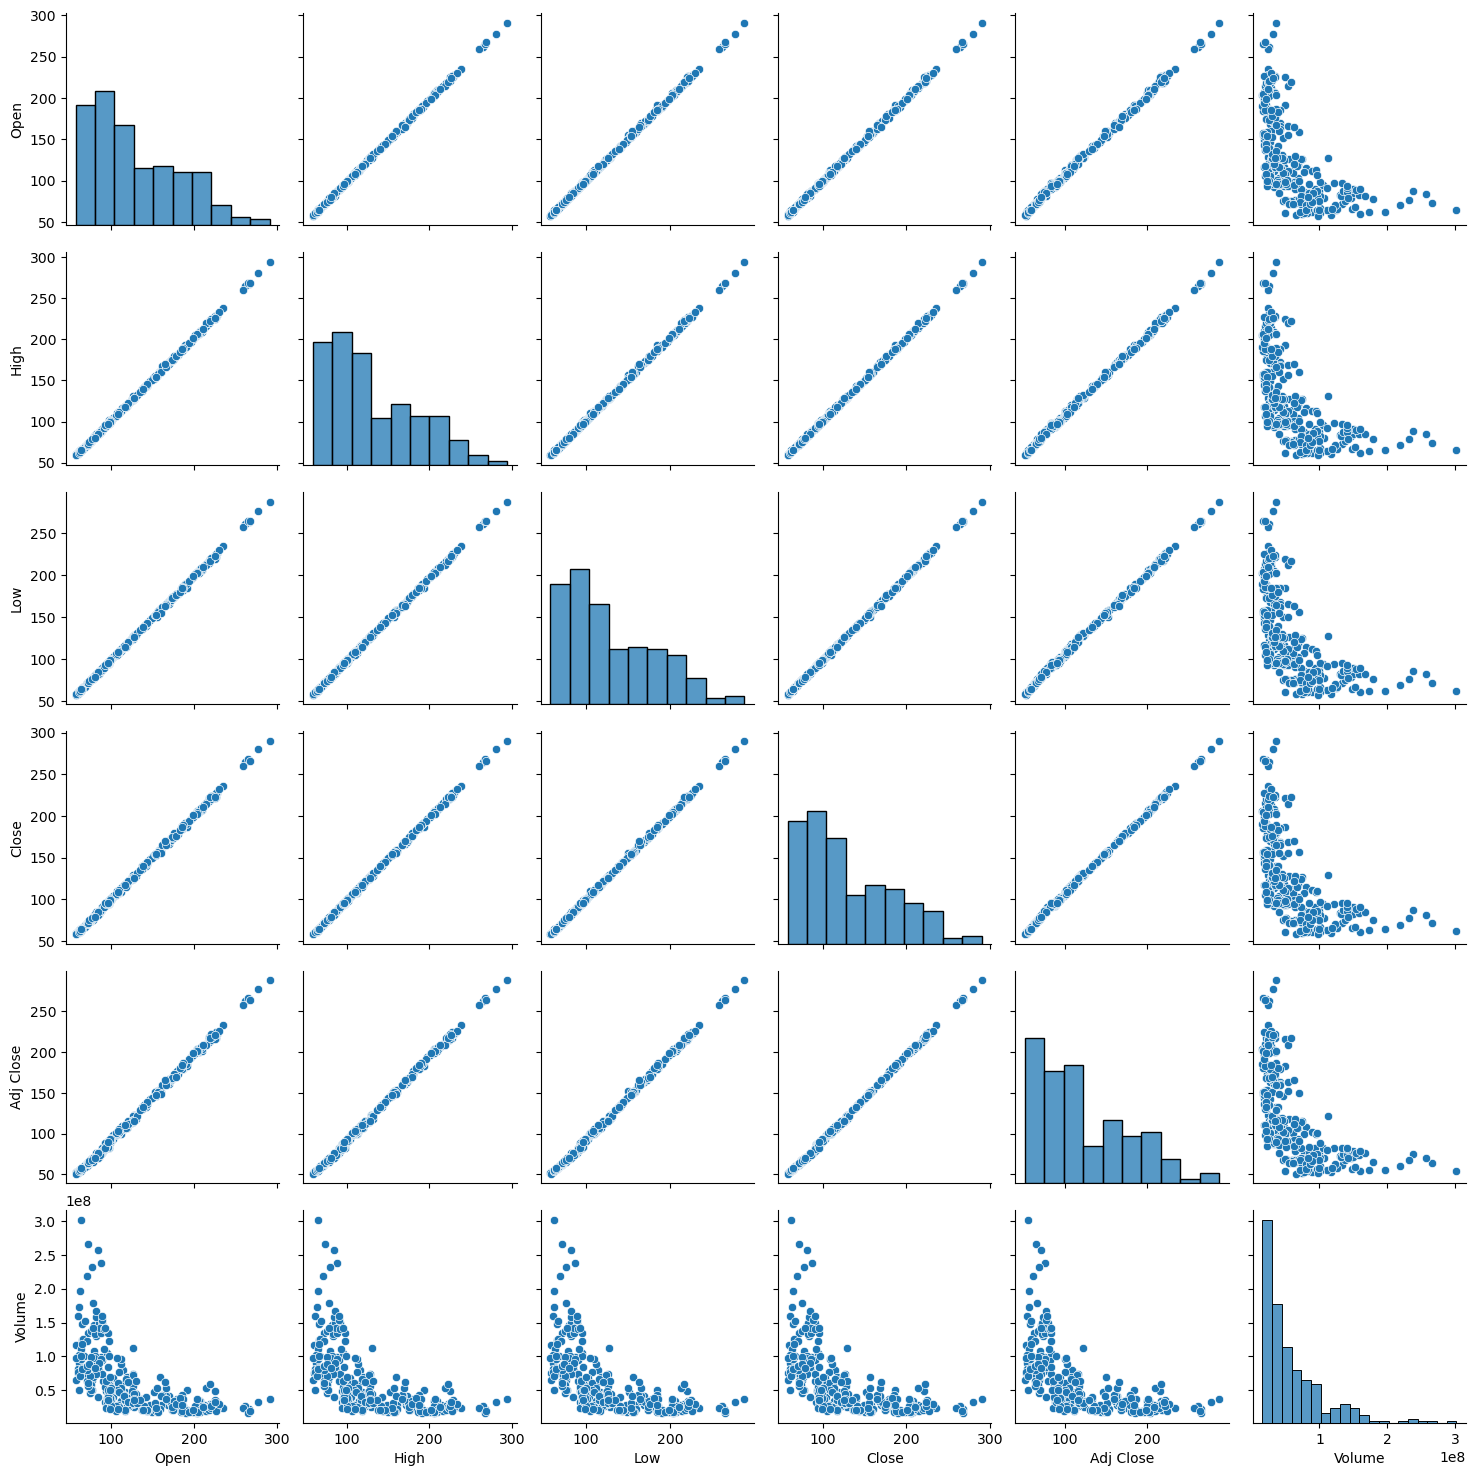

In [35]:
# Pairplot
sns.pairplot(data[['Open','High','Low','Close','Adj Close','Volume']].sample(300))
plt.show()

# Train-Test Split

In [36]:
X = df.select_dtypes(include=['number']).copy()
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# XGBoost Model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
# Training XGBoost Model and Predicting Using XGBoost Model

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred

array([188.40468, 188.03564, 188.08788, 188.15564, 188.43904, 188.35435,
       188.02318, 188.06465, 188.127  , 188.41766, 188.32637, 186.39635,
       186.40579, 186.39227, 186.52399, 181.55602, 186.2244 , 186.35757,
       186.38687, 186.44539, 187.61644, 186.23058, 186.33333, 187.32109,
       188.16455, 187.99701, 187.31631, 189.37523, 188.49095, 188.26552,
       187.9998 , 188.04176, 188.11682, 188.36485, 188.6621 , 188.31349,
       188.11784, 188.08499, 188.41754, 188.32141, 188.04988, 188.06804,
       188.20142, 188.38472, 188.31105, 188.1363 , 188.1492 , 188.20375,
       188.41574, 188.50189, 188.1021 , 188.05984, 188.1248 , 188.43187,
       188.32343, 188.08096, 188.08711, 188.16737, 188.4301 , 188.36461,
       188.09805, 188.12196, 188.21385, 188.43082, 188.36125, 188.10048,
       188.16385, 188.33235, 188.31056, 188.0485 , 188.07115, 188.12003,
       188.34982, 188.32245, 188.01788, 188.0594 , 188.12003, 188.35825,
       188.28595, 188.02678, 188.05582, 188.13191, 

In [39]:
# Evaluate XGBoost

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGB MAE:", xgb_mae)
print("XGB RMSE:", xgb_rmse)

XGB MAE: 21.373846959887146
XGB RMSE: 32.66026324722793


# ARIMA Model

In [40]:
# ARIMA works only on 1D series

train_arima = df['Close'][:-30]
test_arima = df['Close'][-30:]

# Fit ARIMA Model

arima_model = ARIMA(train_arima, order=(5,1,2))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1953
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -4234.109
Date:                Wed, 17 Dec 2025   AIC                           8484.218
Time:                        11:52:02   BIC                           8528.831
Sample:                             0   HQIC                          8500.619
                               - 1953                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0591      0.144      0.411      0.681      -0.223       0.341
ar.L2          0.6936      0.138      5.023      0.000       0.423       0.964
ar.L3         -0.0178      0.020     -0.887      0.375      -0.057       0.022
ar.L4          0.0537      0.022      2.475      0.013       0.011       0.096
ar.L5          0.0560      0.017      3.320      0.001       0.023       0.089
ma.L1         -0.0489      0.143     -0.343      0.732      -0.329       0.231
ma.L2         -0.7532      0.138     -5.469      0.000      -1.023      -0.483
sigma2         4.4832      0.075     59.671      0.000       4.336       4.630
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3366.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.98   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Predicting using ARIMA Model
arima_pred = arima_result.forecast(steps=len(y_test))
arima_pred

1953    264.918928
1954    265.128493
1955    265.510086
1956    265.791256
1957    266.233460
           ...    
2345    270.592467
2346    270.592467
2347    270.592467
2348    270.592467
2349    270.592467
Name: predicted_mean, Length: 397, dtype: float64

In [42]:
# Evaluate ARIMA

arima_mae = mean_absolute_error(y_test, arima_pred)
arima_rmse = math.sqrt(mean_squared_error(y_test, arima_pred))

print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)

ARIMA MAE: 66.30601140745271
ARIMA RMSE: 72.16032769638511


# SARIMA Model

In [43]:
# Fit SARIMA Model

train_sarima = df['Close'][:-30]
test_sarima = df['Close'][-30:]

sarima_model = SARIMAX(train_sarima, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_result.summary()

C:\Users\saile\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                 1953
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -4240.434
Date:                              Wed, 17 Dec 2025   AIC                           8494.867
Time:                                      11:52:26   BIC                           8533.860
Sample:                                           0   HQIC                          8509.207
                                             - 1953                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7539      0.030    -25.200      0.000      -0.813      -0.695
ar.L2         -0.9291      0.028    -32.769      0.000      -0.985      -0.874
ma.L1          0.7800      0.033     23.767      0.000       0.716       0.844
ma.L2          0.9198      0.031     29.941      0.000       0.860       0.980
ar.S.L12       0.0399      0.016      2.462      0.014       0.008       0.072
ma.S.L12      -0.9902      0.008   -121.163      0.000      -1.006      -0.974
sigma2         4.5379      0.077     59.051      0.000       4.387       4.689
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              3394.04
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               5.06   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Predict with SARIMA

sarima_pred = sarima_result.forecast(steps=len(y_test))
sarima_pred

1953    264.608888
1954    264.477322
1955    264.537556
1956    265.395344
1957    265.478975
           ...    
2345    315.506119
2346    315.626461
2347    315.673021
2348    315.658259
2349    315.763930
Name: predicted_mean, Length: 397, dtype: float64

In [45]:
# SARIMA Evaluation

sarima_mae = mean_absolute_error(y_test, sarima_pred)
sarima_rmse = math.sqrt(mean_squared_error(y_test, sarima_pred))

print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)

SARIMA MAE: 85.72694348360467
SARIMA RMSE: 89.53388432295917


# Plotting the Evaluation 

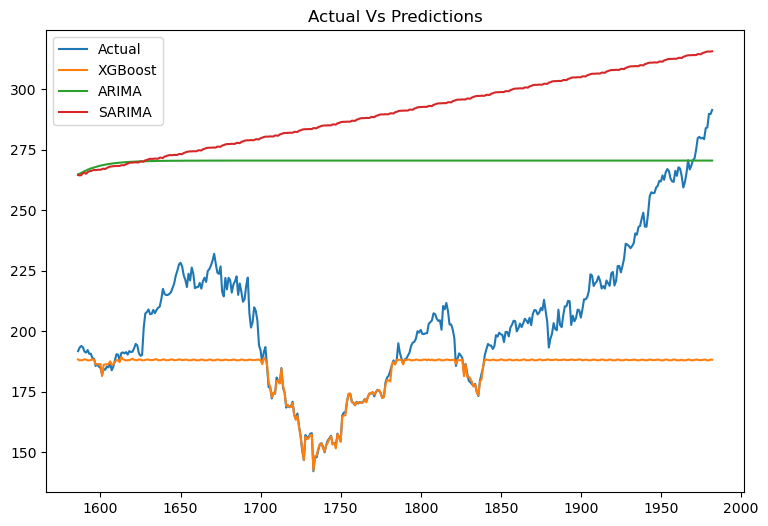

In [46]:
plt.figure(figsize=(9,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost')
plt.plot(y_test.index, arima_pred, label='ARIMA')
plt.plot(y_test.index, sarima_pred, label='SARIMA')
plt.legend()
plt.title('Actual Vs Predictions')
plt.show()

# Forecasting the next 30 Business Days(Using XGBoost Model)

In [47]:
# Create next 30 predictions(XGBoost Model)

temp_df = df.copy()
temp_df.index = pd.to_datetime(temp_df.index)

future_dates =  pd.date_range(start=df['Date'].iloc[-1]+pd.Timedelta(days=1), periods=30)
last_window = data.iloc[-14:].copy()

future_preds_xgb = []

for d in future_dates:
    current_close =last_window['Close'].iloc[-1]
    lag1 = last_window['Close'].iloc[-1]
    lag2 = last_window['Close'].iloc[-2]
    lag3 = last_window['Close'].iloc[-3]
    lag5 = last_window['Close'].iloc[-5]
    lag7 = last_window['Close'].iloc[-7]
    ma7 = last_window['Close'].rolling(7).mean().iloc[-1]
    ma14 = last_window['Close'].rolling(14).mean().iloc[-1]
    ma21 = last_window['Close'].rolling(21).mean().iloc[-1]
    vol = last_window['Close'].rolling(7).std().iloc[-1]
    dow = d.dayofweek
    week = d.isocalendar().week
    month = d.month
    quarter = d.quarter
    year = d.year
    sp500_close = lag1 * 1.02
    inflation = 2.1
    earnings_season = int(month in [1, 4, 7, 10])

    X_new = pd.DataFrame([{
        'Close': current_close,
        'ma7': ma7,
        'ma14': ma14,
        'ma21': ma21,
        'volatility': vol,
        'day_of_week': dow,
        'week_of_year': int(week),
        'month': month,
        'quarter': quarter,
        'year': year,
        'lag_1': lag1,
        'lag_2': lag2,
        'lag_3': lag3,
        'lag_5': lag5,
        'lag_7': lag7,
        'SP500_Close': sp500_close,
        'Inflation': inflation,
        'Earnings_Season': earnings_season,
        'Target': 0          # ✅ dummy placeholder (REQUIRED)
    }])
    pred_val = xgb_model.predict(X_new)[0]

    future_preds_xgb.append((d, pred_val))

    new = pd.DataFrame({'Close': pred_val}, index=[d])
    last_window = pd.concat([last_window, new])
    last_window = last_window.tail(14)


In [48]:
# Convert forecast to DataFrame

forecast_df_xgb = pd.DataFrame(future_preds_xgb, columns=['Date','Predicted'])
forecast_df_xgb.set_index('Date', inplace=True)
forecast_df_xgb

,Predicted
Date,
2019-12-28,62.948498
2019-12-29,58.258999
2019-12-30,57.570225
2019-12-31,57.415867
2020-01-01,57.370152
2020-01-02,57.080376
2020-01-03,57.613667
2020-01-04,57.008575
2020-01-05,57.265629


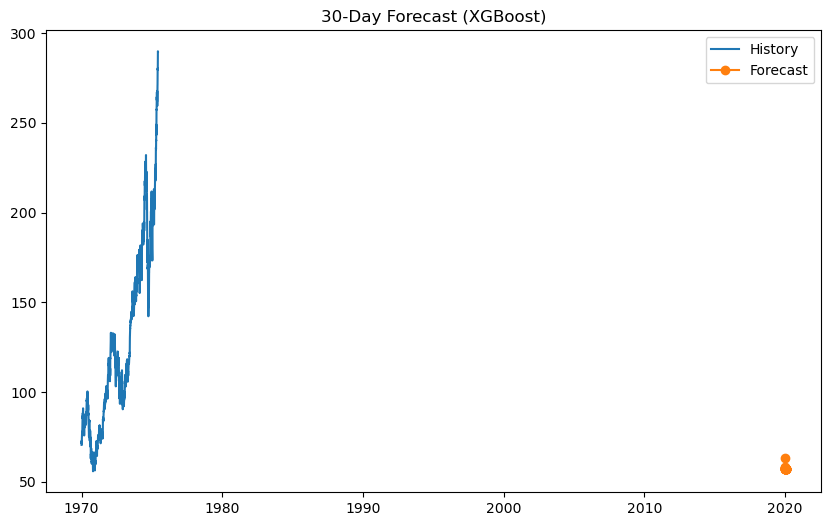

In [49]:
# Plotting the Forecast

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='History')
plt.plot(forecast_df_xgb.index, forecast_df_xgb['Predicted'], marker='o', label='Forecast')
plt.legend()
plt.title("30-Day Forecast (XGBoost)")
plt.show()

# Saving forecast as CSV

In [50]:
# Save forecast as CSV

final_forecast = pd.DataFrame()

final_forecast['Date'] = forecast_df_xgb.index
final_forecast['XGB_Prediction'] = forecast_df_xgb['Predicted'].values

final_forecast.to_csv("XGBoost_forecast.csv", index=False)

final_forecast

,Date,XGB_Prediction
0,2019-12-28,62.948498
1,2019-12-29,58.258999
2,2019-12-30,57.570225
3,2019-12-31,57.415867
4,2020-01-01,57.370152
5,2020-01-02,57.080376
6,2020-01-03,57.613667
7,2020-01-04,57.008575
8,2020-01-05,57.265629
9,2020-01-06,57.274231


# Deployment with Streamlit:

In [51]:
import pickle 

In [52]:
from pickle import dump

In [53]:
# Save the model

pickle.dump(xgb_model,open('xgb_model.pkl','wb'))

In [54]:
# Loading the model

loaded_model = pickle.load(open('xgb_model.pkl','rb'))